## Cleaning Dataset

In [575]:
# Importing all required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [576]:
# Reading the HotelReservationsDataset and displaying top 10 rows of the dataset
df = pd.read_csv("RawHotelReservations.csv")
print("Total Number of Rows:",df.shape[0])
print("Total Number of Columns:",df.shape[1])
df

Total Number of Rows: 36275
Total Number of Columns: 19


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,NaN,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [577]:
# Data Cleaning and Pre-Processing
# Checking for Null Values in the Dataset
df.isnull().sum()
# We can Clearly see that we have some null values in "required_car_parking_space" and "room_type_reserved" columns.

Booking_ID                                0
no_of_adults                              0
no_of_children                            0
no_of_weekend_nights                      0
no_of_week_nights                         0
type_of_meal_plan                       169
required_car_parking_space                0
room_type_reserved                       91
lead_time                                 0
arrival_year                              0
arrival_month                             0
arrival_date                              0
market_segment_type                       0
repeated_guest                            0
no_of_previous_cancellations              0
no_of_previous_bookings_not_canceled      0
avg_price_per_room                        0
no_of_special_requests                    0
booking_status                            0
dtype: int64

In [578]:
# Step-1 (DataCleaning)
# As there are 36275 rows in our dataset removing the rows containing null values will not have much impact on the dataset.
# Therefore removing the rows containing null values from the dataset.
df = df.dropna()
# print(df.head(10))
print("Total Number of Rows:",df.shape[0])
print("Total Number of Columns:",df.shape[1])

Total Number of Rows: 36050
Total Number of Columns: 19


In [579]:
# Checking the datatypes of all the columns and verify whether the columns are having correct datatype.
print(df.dtypes)

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space               object
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object


In [580]:
# After checking all the columns data with its datatype All the columns were looking fine.
# Except "required_car_parking_space" column. 
# It is having int values but its datatype is object that means its containing some unwanted data and needs to be cleaned.

In [581]:
# Step-2 (DataCleaning)
# Converting the "required_car_parking_space" column to int datatype and replacing the unwanted data with null values.
df['required_car_parking_space'] = pd.to_numeric(df['required_car_parking_space'], errors='coerce').astype('Int64')
print(df['required_car_parking_space'].head(15))

0        0
1        0
2        0
3        0
4        0
6     <NA>
7        0
8        0
9        0
10       0
11       0
12       0
14       0
15       0
16       0
Name: required_car_parking_space, dtype: Int64


C:\Users\saite\AppData\Local\Temp\ipykernel_22164\3927894446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['required_car_parking_space'] = pd.to_numeric(df['required_car_parking_space'], errors='coerce').astype('Int64')


In [582]:
# Now the 'required_car_parking_space' Column has only three types of data that are 0, 1 and Null.
print("'required_car_parking_space' column Data Categories:", df['required_car_parking_space'].drop_duplicates().to_list())
print(" ")
print("Occurences of 0's and 1's:")
print(df['required_car_parking_space'].value_counts())

'required_car_parking_space' column Data Categories: [0, <NA>, 1]
 
Occurences of 0's and 1's:
0    34793
1     1115
Name: required_car_parking_space, dtype: Int64


In [583]:
# Step-3 (DataCleaning)
# As we have more significantly 0's than 1's in the 'required_car_parking_space' column Data.
# we are considring 0 as the default value for this column. 
# And replacing the Null values with the default value that is 0.
df['required_car_parking_space'] = df['required_car_parking_space'].fillna(0)
print(df['required_car_parking_space'].head(15))

0     0
1     0
2     0
3     0
4     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
14    0
15    0
16    0
Name: required_car_parking_space, dtype: Int64


C:\Users\saite\AppData\Local\Temp\ipykernel_22164\132936631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['required_car_parking_space'] = df['required_car_parking_space'].fillna(0)


In [584]:
# Step-4 (DataCleaning)
# Dropping the column "Booking_ID" as it is just column that has data which uniquely identifies every row.
# It does not add any significance while training any ML model therfore we are removing this column.
df = df.drop("Booking_ID", axis=1)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [585]:
# Step-5 (DataCleaning)
# Merging the "arrival_year","arrival_month","arrival_date" columns into a single column named "arrival_date"
c = ["arrival_year","arrival_month","arrival_date"]
df['arrival_date'] = df[c].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2017-10-2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,2018-11-6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,2018-2-28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,2018-5-20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,2018-4-11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,2018-10-6,Online,0,0,0,216.00,0,Canceled
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,2018-8-3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,2018-10-17,Online,0,0,0,90.95,2,Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,2018-4-21,Online,0,0,0,94.50,0,Canceled


In [586]:
# Step-6 (DataCleaning)
# Now Dropping the columns "arrival_month", "arrival_year" as we have merged them into "arrival_date" column.
# Changing the datatype of the "arrivaldate" into datetime datatype.
df = df.drop(labels=["arrival_month", "arrival_year"], axis=1)
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')
df
print(df.dtypes)

no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                               object
required_car_parking_space                       Int64
room_type_reserved                              object
lead_time                                        int64
arrival_date                            datetime64[ns]
market_segment_type                             object
repeated_guest                                   int64
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no_of_special_requests                           int64
booking_status                                  object
dtype: object


In [587]:
# Cheching null values for the newly created column "arrival_date" and removing them from the dataset
df["arrival_date"].isnull().sum()

36

In [588]:
# Dropping the rows with Null values in the "arrival_date" column
df = df.dropna()
print("Total Number of Rows:",df.shape[0])
print("Total Number of Columns:",df.shape[1])

Total Number of Rows: 36014
Total Number of Columns: 16


In [589]:
# Step-7 (DataCleaning)
# Dropping duplicate rows
df = df.drop_duplicates()
print("Total Number of Rows:",df.shape[0])
print("Total Number of Columns:",df.shape[1])

Total Number of Rows: 25827
Total Number of Columns: 16


In [590]:
# Copied the cleaned data before encoding into another df named "Cleaned_Raw_df" to perform EDA.
Cleaned_Raw_df = df.copy()

In [591]:
# Step-8 (DataCleaning)
# The columns "type_of_meal_plan", "room_type_reserved", "market_segment_type", "booking_status" can be converted into catregorical datatype columns and encoded.
print("Before Encoding:")
print("type_of_meal_plan Categories:", df["type_of_meal_plan"].drop_duplicates().to_list())
print("room_type_reserved Categories:", df["room_type_reserved"].drop_duplicates().to_list())
print("market_segment_type Categories:", df["market_segment_type"].drop_duplicates().to_list())
print("booking_status Categories:", df["booking_status"].drop_duplicates().to_list())

Before Encoding:
type_of_meal_plan Categories: ['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']
room_type_reserved Categories: ['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5', 'Room_Type 7', 'Room_Type 3']
market_segment_type Categories: ['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']
booking_status Categories: ['Not_Canceled', 'Canceled']


In [592]:
# Encoding different categories of these columns to different integer values using label encoder
le = LabelEncoder()
df['type_of_meal_plan']= le.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved']= le.fit_transform(df['room_type_reserved'])
df['market_segment_type']= le.fit_transform(df['market_segment_type'])
df['booking_status']= le.fit_transform(df['booking_status'])

print("After Encoding:")
print("type_of_meal_plan Categories:", df["type_of_meal_plan"].drop_duplicates().to_list())
print("room_type_reserved Categories:", df["room_type_reserved"].drop_duplicates().to_list())
print("market_segment_type Categories:", df["market_segment_type"].drop_duplicates().to_list())
print("booking_status Categories:", df["booking_status"].drop_duplicates().to_list())
print("repeated_guest Categories:", df["repeated_guest"].drop_duplicates().to_list())

# Converting them to Category Datatypes
df['type_of_meal_plan'] = df['type_of_meal_plan'].astype('category')
df['room_type_reserved'] = df['room_type_reserved'].astype('category')
df['market_segment_type'] = df['market_segment_type'].astype('category')
df['booking_status'] = df['booking_status'].astype('category')
df['required_car_parking_space'] = df['required_car_parking_space'].astype('category')
df['repeated_guest'] = df['repeated_guest'].astype('category')
print(df.dtypes)

After Encoding:
type_of_meal_plan Categories: [0, 3, 1, 2]
room_type_reserved Categories: [0, 3, 1, 5, 4, 6, 2]
market_segment_type Categories: [3, 4, 2, 0, 1]
booking_status Categories: [1, 0]
repeated_guest Categories: [0, 1]
no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                             category
required_car_parking_space                    category
room_type_reserved                            category
lead_time                                        int64
arrival_date                            datetime64[ns]
market_segment_type                           category
repeated_guest                                category
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no

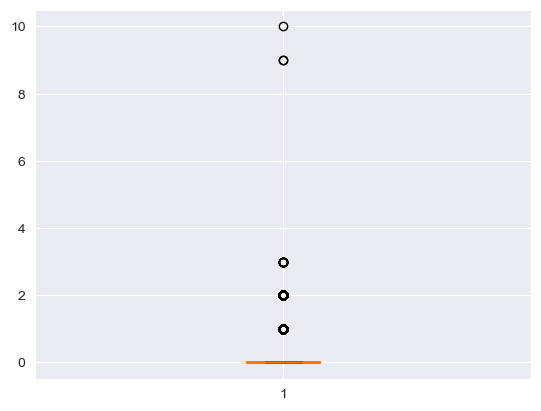

In [593]:
# Step-9 (DataCleaning)
# Using Boxplots of some columns tzo identify the outliers.

# Boxplot for 'no_of_children' column
plt.boxplot(df['no_of_children'])
plt.show()

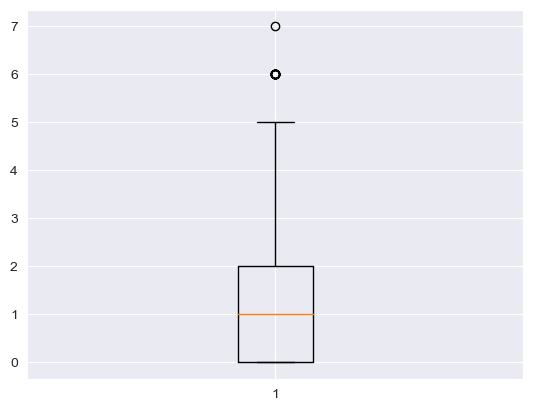

In [594]:
# Boxplot for 'no_of_children' column
plt.boxplot(df['no_of_weekend_nights'])
plt.show()

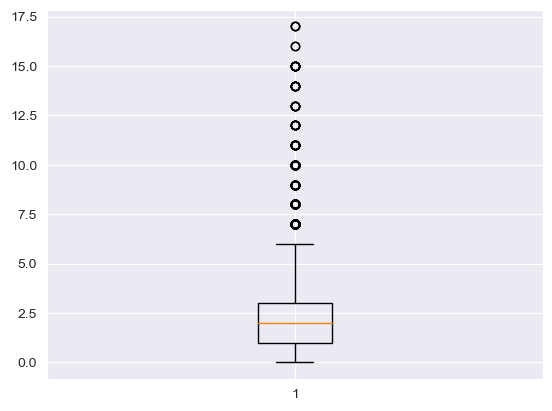

In [595]:
# Boxplot for 'no_of_week_nights' column
plt.boxplot(df['no_of_week_nights'])
plt.show()

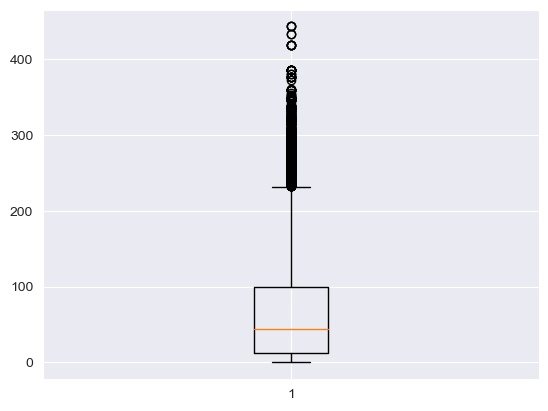

In [596]:
# Boxplot for 'lead_time' column
plt.boxplot(df['lead_time'])
plt.show()

In [597]:
# Step-10 (DataCleaning)
# Filtering out rows based on values and removing outliers using this technique

# From the boxplot we can clearly observe that 10, 8 are outliers and we are considering no. of children above 2 as outliers and removing those rows with the outliers
df=df[df['no_of_children']<=2]
# From the boxplot we can clearly observe that values above 6 are ouliers for this column therefore these are removed.
df=df[df['no_of_weekend_nights']<6]
# From the boxplot we can clearly observe that values above 6 are ouliers for this column therefore these are removed.
df=df[df['no_of_week_nights']<6]
# From the boxplot of no_of_week_nights can clearly observe that values above 220 are ouliers for this column therefore these are removed.
df=df[df['lead_time']<220]

In [598]:
# Step-11 (DataCleaning)
# Re-indexing the rows of the dataset beacuse we have removed several columns with creates missing index values.
df = df.reset_index()
df = df.drop("index", axis=1)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,3,3,0,0,5,2018-11-06,4,0,0,0,106.68,1,1
1,1,0,2,1,0,0,0,1,2018-02-28,4,0,0,0,60.00,0,0
2,2,0,0,2,0,0,0,211,2018-05-20,4,0,0,0,100.00,0,0
3,2,0,1,1,3,0,0,48,2018-04-11,4,0,0,0,94.50,0,0
4,2,0,1,3,0,0,0,34,2017-10-15,4,0,0,0,107.55,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24330,2,0,0,2,0,0,3,187,2018-07-08,4,0,0,0,105.30,0,0
24331,2,0,1,3,0,0,0,15,2018-05-30,4,0,0,0,100.73,0,1
24332,2,0,2,2,0,0,1,8,2018-03-04,4,0,0,0,85.96,1,0
24333,2,2,0,1,0,0,5,0,2018-10-06,4,0,0,0,216.00,0,0


## EDA

In [599]:
# step-1
# Finding statistics like mean, standard deviation, min, max etc., for all numeric features present in our dataset.
df.describe()
# Our dataset features has different scales for different features.

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,24335.000000,24335.000000,24335.000000,24335.000000,24335.000000,24335.000000,24335.000000,24335.000000,24335.000000
mean,1.891720,0.139306,0.838463,2.138155,57.714732,0.029587,0.218245,106.331653,0.748921
std,0.529389,0.446890,0.832628,1.274219,55.249023,0.418931,2.053168,38.120459,0.815722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,11.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,40.000000,0.000000,0.000000,101.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,90.000000,0.000000,0.000000,128.390000,1.000000
max,4.000000,2.000000,4.000000,5.000000,219.000000,13.000000,58.000000,540.000000,5.000000


In [600]:
# Step-2
# Insight on category datatype columns
c = ["type_of_meal_plan","room_type_reserved","market_segment_type","booking_status","required_car_parking_space",'repeated_guest']
for col in Cleaned_Raw_df.columns:
    if col in c:
        print(f"Feature: '{col}'")
        print(Cleaned_Raw_df[col].value_counts())
        print("       ")

Feature: 'type_of_meal_plan'
Meal Plan 1     20242
Not Selected     4452
Meal Plan 2      1128
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
       
Feature: 'required_car_parking_space'
0    24744
1     1083
Name: required_car_parking_space, dtype: Int64
       
Feature: 'room_type_reserved'
Room_Type 1    18522
Room_Type 4     5387
Room_Type 6      935
Room_Type 2      595
Room_Type 5      227
Room_Type 7      155
Room_Type 3        6
Name: room_type_reserved, dtype: int64
       
Feature: 'market_segment_type'
Online           19898
Offline           4082
Corporate         1395
Complementary      354
Aviation            98
Name: market_segment_type, dtype: int64
       
Feature: 'repeated_guest'
0    24989
1      838
Name: repeated_guest, dtype: int64
       
Feature: 'booking_status'
Not_Canceled    18422
Canceled         7405
Name: booking_status, dtype: int64
       


In [601]:
# Step-3
# Correlation Matrix
df_corr = pd.DataFrame(Cleaned_Raw_df)
corr_matrix = df_corr.corr()
corr_matrix

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.050257,0.088385,0.110213,-0.002421,0.153400,-0.239530,-0.062359,-0.145691,0.324807,0.156699
no_of_children,-0.050257,1.000000,0.010164,0.015489,0.021746,0.012585,-0.049290,-0.020962,-0.029617,0.349949,0.096281
no_of_weekend_nights,0.088385,0.010164,1.000000,0.233935,-0.053962,0.134373,-0.090560,-0.029177,-0.038088,-0.001785,0.014092
no_of_week_nights,0.110213,0.015489,0.233935,1.000000,-0.059876,0.223469,-0.120156,-0.034887,-0.057829,0.015601,0.030168
required_car_parking_space,-0.002421,0.021746,-0.053962,-0.059876,1.000000,-0.040809,0.107783,0.027082,0.058604,0.057446,0.071051
lead_time,0.153400,0.012585,0.134373,0.223469,-0.040809,1.000000,-0.148775,-0.053765,-0.087075,-0.041053,-0.008619
repeated_guest,-0.239530,-0.049290,-0.090560,-0.120156,0.107783,-0.148775,1.000000,0.378637,0.561391,-0.202434,-0.029692
no_of_previous_cancellations,-0.062359,-0.020962,-0.029177,-0.034887,0.027082,-0.053765,0.378637,1.000000,0.494162,-0.072033,-0.007671
no_of_previous_bookings_not_canceled,-0.145691,-0.029617,-0.038088,-0.057829,0.058604,-0.087075,0.561391,0.494162,1.000000,-0.131067,0.014861
avg_price_per_room,0.324807,0.349949,-0.001785,0.015601,0.057446,-0.041053,-0.202434,-0.072033,-0.131067,1.000000,0.174160


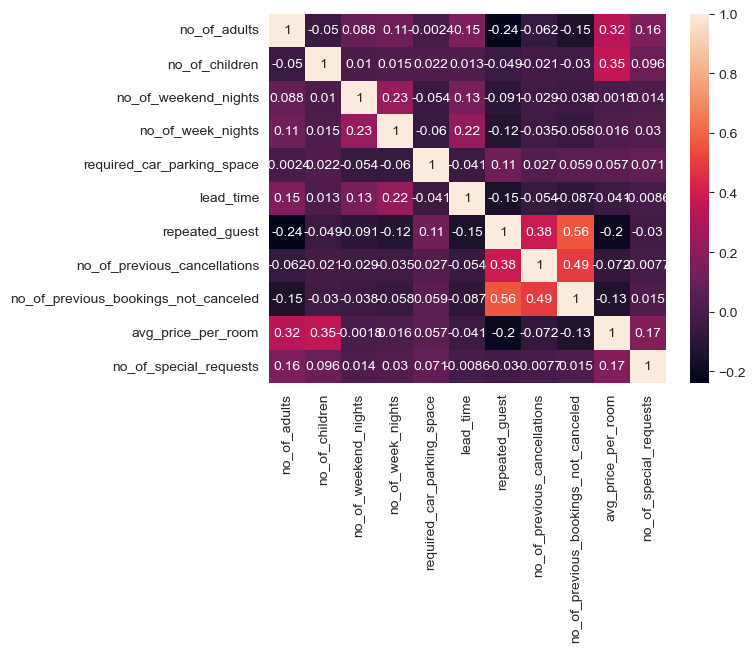

In [602]:
# Plotting the correllation matrix
ax = sns.heatmap(corr_matrix, annot=True)

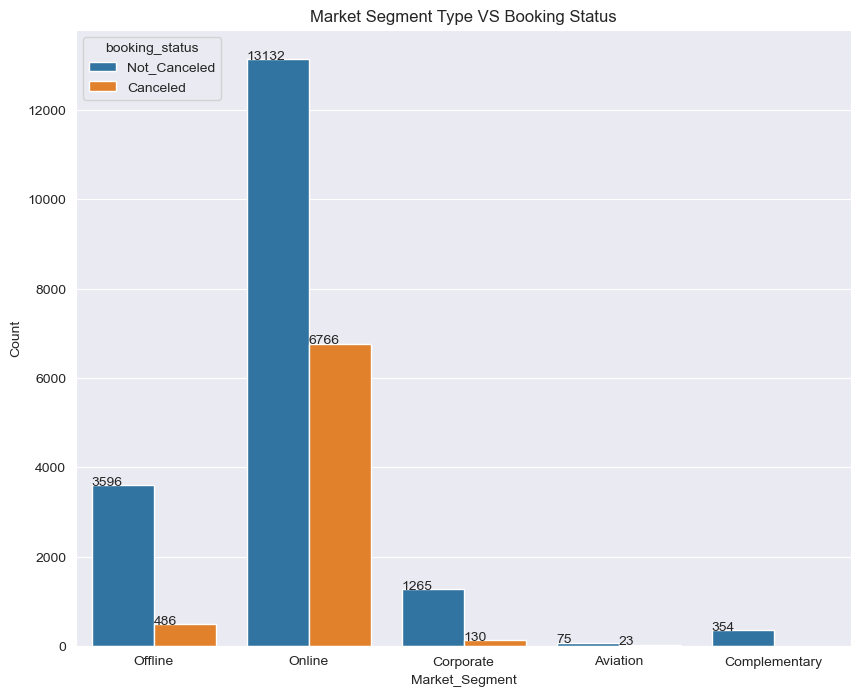

In [603]:
# Step-4
# Plot to know how the market segment is effecting the booking status

plt.figure(figsize=(10,8))
ax=sns.countplot(data=Cleaned_Raw_df,x='market_segment_type',hue='booking_status')
plt.title('Market Segment Type VS Booking Status')
plt.xlabel('Market_Segment')
plt.ylabel('Count')
for g in ax.patches:
         ax.annotate(f'{g.get_height():.0f}', (g.get_x(), g.get_height()))

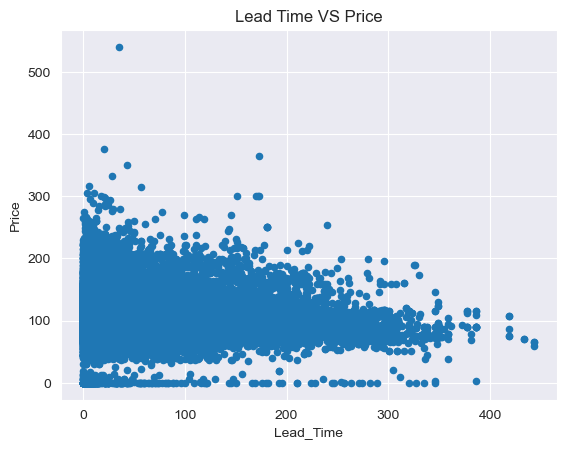

In [604]:
# Step-5
# Scatter Plot to know how the lead time affects the price
df = pd.DataFrame(Cleaned_Raw_df, columns=["lead_time", "avg_price_per_room"])
df.plot(x="lead_time", y="avg_price_per_room", kind='scatter')
plt.title('Lead Time VS Price')
plt.xlabel('Lead_Time')
plt.ylabel('Price')
plt.show()

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='avg_price_per_room'>

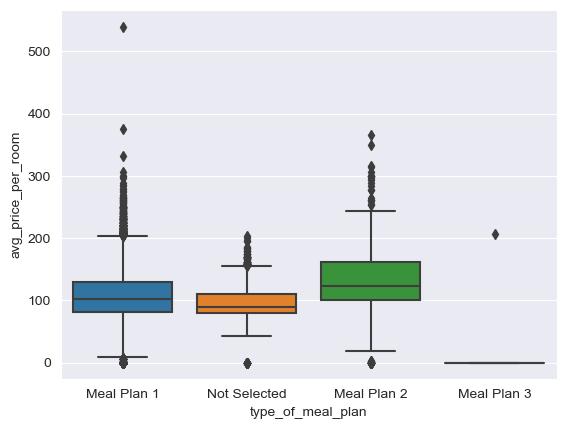

In [605]:
# Step-6
sns.boxplot(x = Cleaned_Raw_df['type_of_meal_plan'], y = Cleaned_Raw_df['avg_price_per_room'])

In [606]:
# Step-7
# Grouped booking_status with respect to repeated guests to know the cancellation trend of a repeated guest vs non-repeated guest
Cleaned_Raw_df.groupby("repeated_guest")["booking_status"].value_counts()

repeated_guest  booking_status
0               Not_Canceled      17592
                Canceled           7397
1               Not_Canceled        830
                Canceled              8
Name: booking_status, dtype: int64

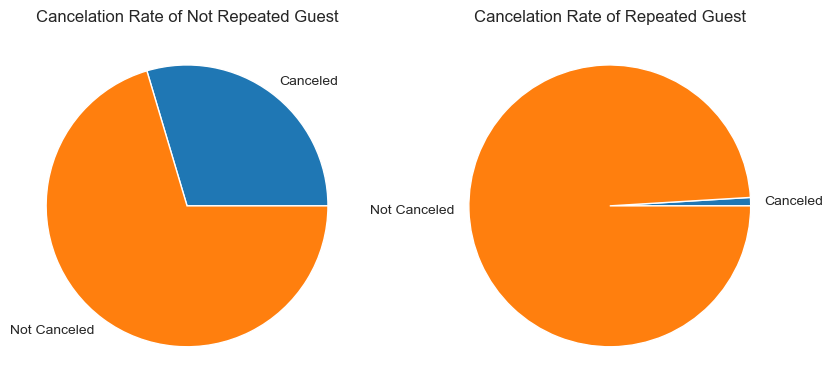

In [607]:
# Plotting a pie chart from the obtained data
fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'aspect': 'equal'})
ax[0].pie([7397,17592], labels=["Canceled","Not Canceled"])
ax[0].set_title("Cancelation Rate of Not Repeated Guest")
ax[1].pie([8,830], labels=["Canceled","Not Canceled"])
ax[1].set_title("Cancelation Rate of Repeated Guest");

C:\Users\saite\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type_reserved', ylabel='count'>

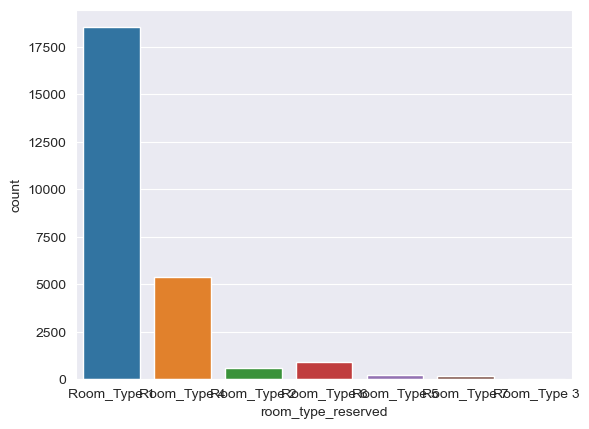

In [608]:
# Step-8
# Count plot of room_type to know the room preseference of the customers
sns.countplot(Cleaned_Raw_df.room_type_reserved)

((array([-4.039018  , -3.82591326, -3.70943118, ...,  3.70943118,
          3.82591326,  4.039018  ]),
  array([  0. ,   0. ,   0. , ..., 365. , 375.5, 540. ])),
 (37.078213847305115, 105.75196073876178, 0.9785087666355397))

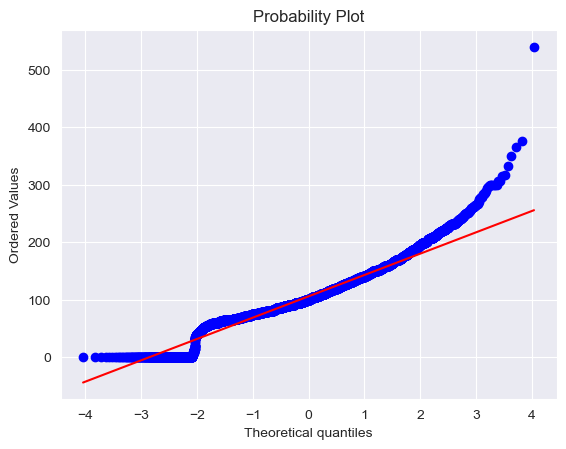

In [609]:
# Step-9 
# Probability Plot of avg_price_per_room
stats.probplot(Cleaned_Raw_df.avg_price_per_room, dist='norm', plot = plt)

In [610]:
# Step-10
print("avg_price_per_room Skewness:", Cleaned_Raw_df["avg_price_per_room"].skew(axis = 0))
print("lead_time Skewness:", Cleaned_Raw_df["lead_time"].skew(axis = 0))

print("avg_price_per_room kutosis:", stats.kurtosis(Cleaned_Raw_df.avg_price_per_room, bias=True))
print("lead_time kurtosis:", stats.kurtosis(Cleaned_Raw_df.lead_time, bias=True))

avg_price_per_room Skewness: 0.5884097838674266
lead_time Skewness: 1.4069956394477487
avg_price_per_room kutosis: 2.615770813126737
lead_time kurtosis: 1.8712380360556624


Finding the spread and skewness of the above two columns using boxplots


<AxesSubplot:>

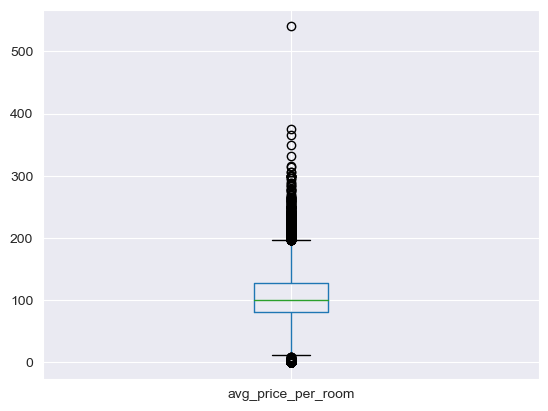

In [611]:
print("Finding the spread and skewness of the above two columns using boxplots")
Cleaned_Raw_df.boxplot(column=['avg_price_per_room'])

<AxesSubplot:>

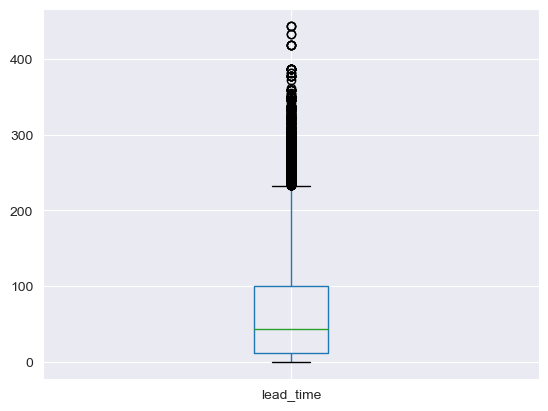

In [612]:
Cleaned_Raw_df.boxplot(column=['lead_time'])

### Note: The dataset used for entire EDA is before performing Encoding and Outliers. We have done that in the final steps of DataCleaning.

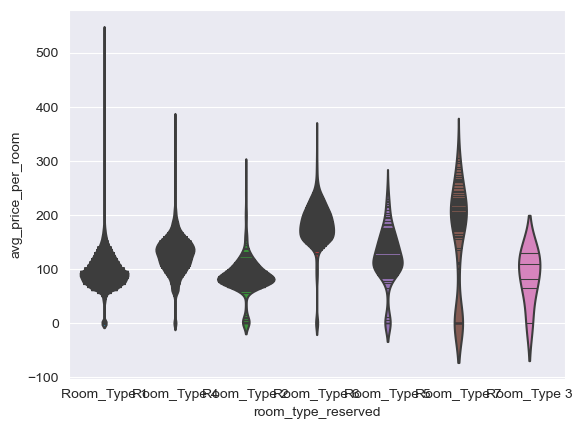

In [613]:
# Step-11
# Violin Graph
sns.violinplot(x = 'room_type_reserved', y = "avg_price_per_room" ,data = Cleaned_Raw_df, inner="stick")
plt.show()